In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
#We can drop the Serial No since it do not add any value in our evaluation

In [7]:
df.drop('Serial No.',axis = 1,inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [10]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<Axes: >

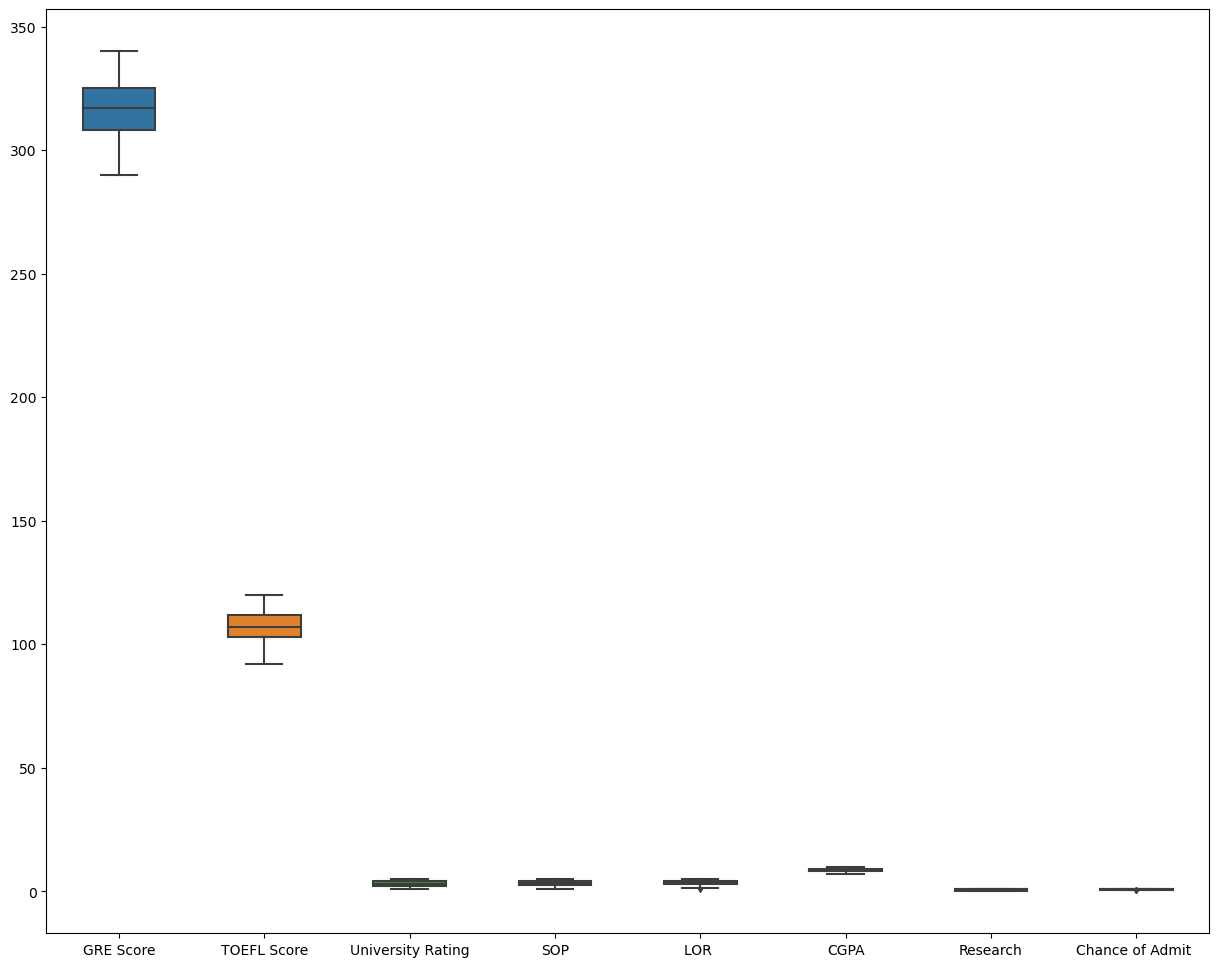

In [13]:
fig,ax = plt.subplots(figsize = (15,12))
sns.boxplot(df,ax= ax,width = 0.5,fliersize=3)

In [14]:
# We can continue to build model now
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [20]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [21]:
#splitting the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=42)

In [24]:
#scaling of features
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [27]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,y_train)

SVR()

In [30]:
y_pred = model.predict(X_test)
y_pred

array([0.86730905, 0.78311667, 0.58093393, 0.70641354, 0.79341974,
       0.84607978, 0.50245276, 0.68222025, 0.7883296 , 0.7573106 ,
       0.65504584, 0.70493531, 0.65343474, 0.87239466, 0.81190584,
       0.46333579, 0.78743107, 0.59085591, 0.49103003, 0.60351015,
       0.65611656, 0.61584382, 0.69263092, 0.70042628, 0.729947  ,
       0.58534733, 0.8746392 , 0.83357508, 0.62602899, 0.72489479,
       0.55497355, 0.71245588, 0.5712116 , 0.84832221, 0.62812728,
       0.6887336 , 0.50742885, 0.88029434, 0.63248987, 0.68127963,
       0.86355509, 0.56092299, 0.63220948, 0.85648201, 0.84859569,
       0.5575291 , 0.89764685, 0.80890493, 0.73006926, 0.87477338,
       0.8302305 , 0.52652146, 0.71331778, 0.50027146, 0.88345212,
       0.59849539, 0.85558985, 0.70668222, 0.68207581, 0.48440443,
       0.6318642 , 0.65860329, 0.57120285, 0.60539271, 0.45818912,
       0.57196888, 0.86538236, 0.85245852, 0.63632191, 0.66109929,
       0.61168615, 0.72138722, 0.66296809, 0.56780213, 0.50389

In [28]:
from sklearn.metrics import r2_score

### R square score and adjusted R square

In [37]:
score = r2_score(y_pred,y_test)
score

0.6391804808808369

In [32]:
## Adjusted R+ square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6213936031777796

### Doing Hyper parameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
parameters = [{'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = GridSearchCV(estimator =model,param_grid=parameters,
                           scoring = "r2",cv =10 ,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

In [35]:
grid_search.best_params_

{'C': 100, 'kernel': 'linear'}

In [36]:
grid_search.best_score_

0.7555204141929476

In [38]:
# Creating new model using the parameters we have got using hyperparameter tuning
model = SVR(C= 100, kernel = 'linear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [39]:
# R squared test
score = r2_score(y_pred,y_test)
score

0.77132842085996

In [40]:
## Adjusted R+ square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7600558782262961

### Here the R square scored improved drastically after hyperparameter tuning 